In [1]:
# !pip install matplotlib
# !pip install nltk
# !pip install glob2

In [2]:
# !pip install scikit-learn
# !pip install seaborn

In [3]:
#!pip install tensorflow

In [4]:
# !pip install transformers

In [5]:
%matplotlib inline
import re
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import numpy as np
from glob import glob
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.pipeline import Pipeline 

import string
from os import listdir
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from pickle import dump
from string import punctuation

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
import torch

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shafe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\shafe\anaconda3\envs\withtorch\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [6]:
import tensorflow as tf

In [174]:
data=pd.read_csv('Rdatafile.csv',encoding='utf-8')

In [175]:
data.columns

Index(['_id', 'title', 'author', 'publisher', 'category', 'summery',
       'authorDescription', 'imageUrl', 'Fiction', 'NonFiction', 'Drama',
       'Mystery', 'Tragedy', 'Thriller', 'Motivational', 'Romantic',
       'isValidate', 'isShow', 'userId'],
      dtype='object')

In [176]:
data=data.drop(['_id','title','author','publisher','category','imageUrl','authorDescription','isShow','userId'],axis=1)

In [177]:
data.drop(data[data['isValidate'] ==0].index, inplace = True)

In [178]:
data.shape

(10211, 10)

In [179]:
data.columns

Index(['summery', 'Fiction', 'NonFiction', 'Drama', 'Mystery', 'Tragedy',
       'Thriller', 'Motivational', 'Romantic', 'isValidate'],
      dtype='object')

In [180]:
data.rename(columns={'summery':'context'},inplace=True)

In [181]:
data=data.drop(['isValidate'],axis=1)

In [182]:
data.columns

Index(['context', 'Fiction', 'NonFiction', 'Drama', 'Mystery', 'Tragedy',
       'Thriller', 'Motivational', 'Romantic'],
      dtype='object')

In [183]:
data['context'].iloc[1]

"আচ্ছা ভালােবাসার গল্পটা শুরু হয় কোথা থেকে বা কীভাবে? এর উত্তর কি কারাে জানা আছে? কেউ কেউ নাকি মনের অজান্তেই কাউকে ভালােবেসে ফেলে! কাউকে ভালােবাসলাম অথচ নিজের মন তা টের পেল না, ব্যাপারটা কেমন ঠেকে না! আচ্ছা সব ভালােবাসায় কি মিলন হয়? আমি তাে দেখেছি শতকরা ৯৫ ভাগ ভালােবাসায় মিলন হয় না। আর। হলেও একটু ঝাঁকাঝাঁকি করতে হয়। আবার এমনও কেউ আছে যাদের ভালােবাসা নীরবে-নিভৃতে কাঁদে! মনে মনে অন্যকে ভালােবেসে ভালােবাসা নামের বিশাল সমুদ্রে গলা পর্যন্ত নেমে যাওয়ার পরে ভালােবাসার কথা তার প্রিয় মানুষটিকে বলতেই পারেনি। আর যখন বলার জন্য মনে সাহস আর শক্তি সঞ্চয় করে তার প্রিয় মানুষটির দ্বারস্থ হয়, তখন অনেক দেরি হয়ে যায়! ততক্ষণে তার মনের মানুষ অন্য কারাে জীবনের সাথে জড়িয়ে পড়ে! তখন তার মনে যে আঘাত দেয়া হয় বা তার মনের উপর যে লােডশেডিং পড়ে মনটা অন্ধকারে নিপতিত হয়, তা কি আর কখনাে আলাের মুখ দেখতে পারবে? কারাে উপর যখন বজ্রপাত পড়ে তখন নাকি সেই মানুষটির দেহের ভিতর দিয়ে ৩০০০০০ ভােল্টের বিদ্যুৎ প্রবাহিত হয়। ফলস্বরূপ সেখানেই ঘটে জীবনের ইতি।,আচ্ছা, একটি ছেলে বা একটি মেয়ের মনের উপর যখন বজ্রপাত পড়ে 

In [163]:
data=data.fillna(0)

In [164]:
cols=data.columns
for c in cols:
  if c !='context':
    #data[c]=data[c].astype(bool)
    data[c]=data[c].astype(int)

In [165]:
character_set_not =  ['\n',
 '!',
 '"',
 '#',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '=',
 '?',
 '[',
 '\\',
 ']',
 '{',
 '}',
 '\xa0',
 '¬',
 '´',
 '·',
 '।',
 '\u09e4',
 '৷',
 '\u200d',
 '–',
 '—',
 '‘',
 '’',
 '“',
 '”',
 '•',
 'ঃ']

In [166]:
def cleaningData(s):
    for i in character_set_not:
        s =  s.replace(i,'');
    return  s

In [167]:
data['context']=data['context'].map(cleaningData)

In [168]:
#!pip install install openpyxl

In [173]:
data['context'].iloc[1]

'আচ্ছা ভালােবাসার গল্পটা কীভাবে কারাে মনের অজান্তেই ভালােবেসে ফেলে ভালােবাসলাম মন টের পেল না ব্যাপারটা কেমন ঠেকে না আচ্ছা ভালােবাসায় মিলন তাে দেখেছি শতকরা ৯৫ ভাগ ভালােবাসায় মিলন না একটু ঝাঁকাঝাঁকি এমনও ভালােবাসা নীরবেনিভৃতে কাঁদে অন্যকে ভালােবেসে ভালােবাসা নামের বিশাল সমুদ্রে গলা নেমে ভালােবাসার কথা প্রিয় মানুষটিকে বলতেই পারেনি বলার সাহস শক্তি সঞ্চয় প্রিয় মানুষটির দ্বারস্থ দেরি ততক্ষণে মনের কারাে জীবনের সাথে জড়িয়ে পড়ে আঘাত দেয়া মনের লােডশেডিং পড়ে মনটা অন্ধকারে নিপতিত কখনাে আলাের পারবে কারাে বজ্রপাত পড়ে মানুষটির দেহের ভিতর ৩০০০০০ ভােল্টের বিদ্যুৎ প্রবাহিত ফলস্বরূপ সেখানেই ঘটে জীবনের ইতিআচ্ছা ছেলে মেয়ের মনের বজ্রপাত পড়ে মনের ভেতর বিদ্যুৎ প্রবাহিত ভােল্টের পরিমাণ কোনাে বিজ্ঞানী পারবেন বােধহয় না বিজ্ঞানীও অসহায় বােধ ধারণাঅন্যদিকে ভালােবাসা নামের বায়বীয় আবেগনির্ভর অনুভব কারাে জীবনে মহা আনন্দের বার্তা এলেও বেশিরভাগের বয়ে আনে চরম ভােগান্তি হতাশা এমনই পাওয়ানাপাওয়ার গল্প হুমায়ুন কবীর হিমু লিখেছেন ভালােবাসায় বজ্রপাত উপন্যাসটিভালােবাসায় বজ্রপাত উপন্যাস মেয়ের প্রকাশ নাকরতে 

In [23]:
data.describe()

,Fiction,NonFiction,Drama,Mystery,Tragedy,Thriller,Motivational,Romantic
count,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000,10211.000000
mean,0.666732,0.210263,0.379101,0.334737,0.191558,0.357164,0.242679,0.194202
std,0.471405,0.407516,0.485187,0.471922,0.393546,0.479187,0.428724,0.395605
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [24]:
df = data.drop(['context'], axis=1)
counts = []
categories = list(df.columns.values)
for i in categories:
    counts.append((i, df[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_count'])
df_stats

,category,number_of_count
0,Fiction,6808
1,NonFiction,2147
2,Drama,3871
3,Mystery,3418
4,Tragedy,1956
5,Thriller,3647
6,Motivational,2478
7,Romantic,1983


Text(0.5, 0, 'category')

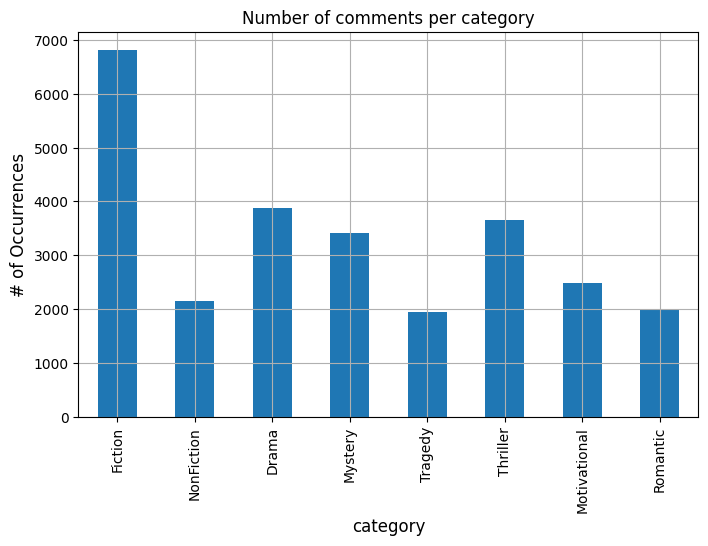

In [25]:
df_stats.plot(x='category', y='number_of_count', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)

In [26]:
data['length'] = data['context'].apply(lambda x:len(x.split()))

In [27]:
data = data.loc[data.length>15]
data = data.reset_index(drop = True)


In [28]:
data.shape

(10104, 10)

In [29]:
data=data.drop(['length'],axis=1)

In [30]:
LABEL_COLUMNS = data.columns.tolist()[1:]

In [31]:
data[LABEL_COLUMNS].sum()

Fiction         6731
NonFiction      2124
Drama           3833
Mystery         3384
Tragedy         1943
Thriller        3624
Motivational    2456
Romantic        1966
dtype: int64

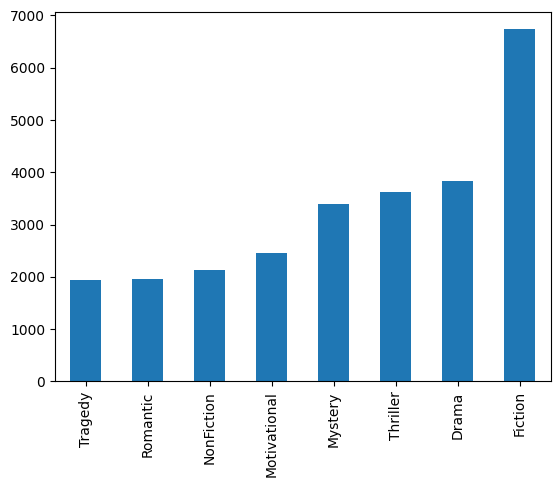

In [32]:

data[LABEL_COLUMNS].sum().sort_values().plot(kind="bar");

In [33]:
stop_word_list = (stopwords.words('bengali'))

In [34]:
stop_word_list

['অতএব',
 'অথচ',
 'অথবা',
 'অনুযায়ী',
 'অনেক',
 'অনেকে',
 'অনেকেই',
 'অন্তত',
 'অন্য',
 'অবধি',
 'অবশ্য',
 'অর্থাত',
 'আই',
 'আগামী',
 'আগে',
 'আগেই',
 'আছে',
 'আজ',
 'আদ্যভাগে',
 'আপনার',
 'আপনি',
 'আবার',
 'আমরা',
 'আমাকে',
 'আমাদের',
 'আমার',
 'আমি',
 'আর',
 'আরও',
 'ই',
 'ইত্যাদি',
 'ইহা',
 'উচিত',
 'উত্তর',
 'উনি',
 'উপর',
 'উপরে',
 'এ',
 'এঁদের',
 'এঁরা',
 'এই',
 'একই',
 'একটি',
 'একবার',
 'একে',
 'এক্',
 'এখন',
 'এখনও',
 'এখানে',
 'এখানেই',
 'এটা',
 'এটাই',
 'এটি',
 'এত',
 'এতটাই',
 'এতে',
 'এদের',
 'এব',
 'এবং',
 'এবার',
 'এমন',
 'এমনকী',
 'এমনি',
 'এর',
 'এরা',
 'এল',
 'এস',
 'এসে',
 'ঐ',
 'ও',
 'ওঁদের',
 'ওঁর',
 'ওঁরা',
 'ওই',
 'ওকে',
 'ওখানে',
 'ওদের',
 'ওর',
 'ওরা',
 'কখনও',
 'কত',
 'কবে',
 'কমনে',
 'কয়েক',
 'কয়েকটি',
 'করছে',
 'করছেন',
 'করতে',
 'করবে',
 'করবেন',
 'করলে',
 'করলেন',
 'করা',
 'করাই',
 'করায়',
 'করার',
 'করি',
 'করিতে',
 'করিয়া',
 'করিয়ে',
 'করে',
 'করেই',
 'করেছিলেন',
 'করেছে',
 'করেছেন',
 'করেন',
 'কাউকে',
 'কাছ',
 'কাছে',
 'কাজ',
 'কাজে',
 'কারও',
 '

In [35]:
sample_row = data.iloc[125]
sample_comment = sample_row.context
sample_labels = sample_row[LABEL_COLUMNS]

print(sample_comment)
print(sample_labels.to_dict())

বৈরাগীর ছোট বউ বৈরাগীকে বেসামাল সুখে রাখে তবু সাগরের ঢেউ দেখার অভ্যেস বৈরাগীর গেল না সাগরের ঢেউ অহর্নিশি দেখতে গিয়ে ওর দুদুটো বউ হাতছাড়া হয়ে গেছে ছোট বউ মনে হয় ফিক্সড হয়ে গেল বৈরাগীর ঘরে এখন শাওন নামের চার বছরের সন্তান ওর ভিন্ন ভাবনায় ফুলস্টপ টেনে দেয়  বৈরাগী ছাত্র বয়সে বেশ মেধাবী ছিল সেই মেধা কাজে লাগিয়েছে যুবকযুবতিদের পেছনে পেছনে ঘুরে তাদের কাজকারবার হাবভাব অনুযায়ী দুই হাত এক করে দিয়েছে দিনে দিনে বৈরাগীর হাতে একতারার বদলে এসেছে মিষ্টির প্যাকেট খামে মোড়ানো টাকা আর নতুন শার্ট প্যান্ট লুঙ্গি  বৈরাগী এখন ঘটক মশাই নামে বেশি পরিচিত ঘুম থেকে উঠে বৈরাগীর মুখ দেখলে মানুষের মন ভালো হয়ে যায় এলাকায় একমাত্র বৈরাগী গলা ছেড়ে গান গায় যখন তখন ওর গানে মুগ্ধ হয়ে কেউ কেউ ঘাড় ঘুরিয়ে তাকায় বৈরাগী তাকায় আকাশ নদী আর প্রকৃতির দিকে আর ওর মন কেমন করে সেই মন কেমন করা মুহূর্তে ওর সামনে ধপাস করে এসে বসে বিজলি বলে ওই বেরসিক ঘটক তোমার চোখ নেই আছে তো তাহলে আমার বিয়ে দ্যাও না ক্যান মাত্র তো ক্লাস টেনে পড়িস মা পড়াশোনা কর বড় হ পাত্র তো হাতছাড়া হয়ে যাচ্ছে না  পাত্র হাতছাড়া হতে বাকি কই সে তো শুধু উড়াল দিতে চায় আচ্ছা আমি 

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [37]:
%%capture
!pip3 install iterative-stratification
!pip install scikit-multilearn

In [38]:
X = data['context']


In [39]:
y = data[['Fiction', 'NonFiction', 'Drama', 'Mystery', 'Tragedy',
       'Thriller', 'Motivational', 'Romantic']]
y

,Fiction,NonFiction,Drama,Mystery,Tragedy,Thriller,Motivational,Romantic
0,0,1,1,0,0,0,0,1
1,0,0,1,0,0,0,0,1
2,0,1,1,0,0,0,0,1
3,0,1,0,0,1,0,0,0
4,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...
10099,1,0,0,0,0,0,1,0
10100,1,0,0,0,1,0,1,0
10101,1,0,0,0,1,0,1,0
10102,1,0,0,0,1,1,1,1


In [40]:
X = X.to_numpy()
y = y.to_numpy()

In [41]:
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
msss = MultilabelStratifiedShuffleSplit(n_splits=2, test_size=0.40, random_state=42)
for train_index, test_index in msss.split(X, y):
        x_train, x_test_temp = X[train_index], X[test_index]
        y_train, y_test_temp = y[train_index], y[test_index]

In [42]:
msss = MultilabelStratifiedShuffleSplit(n_splits=2, test_size=0.4, random_state=42)
for val_index, test_index in msss.split(x_test_temp, y_test_temp):
        x_val, x_test = X[val_index], X[test_index]
        y_val, y_test = y[val_index], y[test_index]

In [43]:
train_text = pd.DataFrame(x_train, columns = ['context'])
train_label = pd.DataFrame(y_train, columns = ['Fiction', 'NonFiction', 'Drama', 'Mystery', 'Tragedy',
       'Thriller', 'Motivational', 'Romantic'])
train_df = pd.concat([train_text, train_label], axis=1, join='inner')
train_df = train_df.loc[((train_df['Fiction'] == 1) | (train_df['NonFiction'] == 1) | (train_df['Drama'] ==1) | (train_df['Mystery'] == 1) | (train_df['Tragedy'] == 1) | (train_df['Thriller'] ==1)| (train_df['Motivational'] ==1)| (train_df['Romantic'] ==1))]
train_df = train_df.sample(frac=1).reset_index(drop=True)
train_df

,context,Fiction,NonFiction,Drama,Mystery,Tragedy,Thriller,Motivational,Romantic
0,নাহিদ আহমেদ সুমিকোর ইতিহাস আশ্রিত উপন্যাস দাদন...,0,1,0,0,0,0,0,0
1,দ্বীপ অবাক হয়ে ইরানীর দিকে তাকিয়ে রইল বিচ্ছেদ ...,1,0,0,0,0,1,0,1
2,বইয়ের ফ্ল্যাপের লেখা বড়াে ভাইয়ের জন্য পাত্রী...,1,0,1,1,0,1,0,1
3,জগতের অশেষ কল্যাণ সাধন করেছে মানুষ আর মানুষকে ...,0,0,0,1,0,1,0,0
4,স্প্যানিশভাষী দুনিয়া ও রবীন্দ্রনাথ বইয়ের প্রথ...,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
6059,ফ্ল্যাপে লিখা কথা গান্ধী কেবল ভারতবর্ষের পক্ষ...,0,1,0,0,0,0,1,0
6060,পালিয়ে বেড়াচ্ছে ওরা দুজনেই আহত সাতদিন হতে চলল ...,1,0,1,1,0,1,0,0
6061,কাহিনী সংক্ষেপ নতুন শতাব্দীর প্রথম সূর্য গ্রহণ...,1,0,0,1,0,1,0,0
6062,মেসেঞ্জারে আলাপ আজকের দুনিয়ার একটি প্রাত্যহিক ...,0,1,0,0,0,0,0,0


In [44]:
x_train = train_df['context']
y_train = train_df[['Fiction', 'NonFiction', 'Drama', 'Mystery', 'Tragedy',
       'Thriller', 'Motivational', 'Romantic']]
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()

In [45]:
val_text = pd.DataFrame(x_val, columns = ['context'])
val_label = pd.DataFrame(y_val, columns = ['Fiction', 'NonFiction', 'Drama', 'Mystery', 'Tragedy',
       'Thriller', 'Motivational', 'Romantic'])
val_df = pd.concat([val_text, val_label], axis=1, join='inner')
val_df = val_df.loc[((val_df['Fiction'] == 1) | (val_df['NonFiction'] == 1) | (val_df['Drama'] ==1) | (val_df['Mystery'] == 1) | (val_df['Tragedy'] == 1) | (val_df['Thriller'] ==1)| (val_df['Motivational'] ==1)| (val_df['Romantic'] ==1))]
val_df = val_df.sample(frac=1).reset_index(drop=True)
val_df

,context,Fiction,NonFiction,Drama,Mystery,Tragedy,Thriller,Motivational,Romantic
0,কয়েক মুহূর্ত নীরব থেকে রাহাত বললো রিতু ভালোবাস...,1,0,1,0,0,0,0,1
1,বিধাতা পৃথিবীতে মধ্যবিত্ত বলে এক প্রজাতি সৃষ্ট...,1,0,1,1,1,0,0,1
2,সমসাময়িক এবং বাস্তব ঘটনা অবলম্বনে রচিত ইট পাথর...,1,0,1,1,0,0,0,0
3,একদিন এই শহরে বইটির ফ্ল্যাপ এর লেখা আজ চলে যাচ...,0,1,0,0,1,0,0,0
4,অবৃক্ষমানুষ নামটি খুবই আত্মব্যাখ্যাত মানুষ বৃক...,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
2440,শতবর্ষের পশ্চাৎপদতার অলঙ দেয়াল রক্তস্রোতে জমে...,0,1,0,0,0,1,0,0
2441,রথীন্দ্র প্রসাদ দত্ত গল্প বলেন গদ্য লিখেন তুখো...,1,0,1,0,0,0,1,0
2442,ত্রিধারবইটির প্রথম ফ্লাপের কিছু কথা সরু পাকা প...,1,0,0,0,1,1,0,0
2443,বিভোরে ঘুমিয়ে থাকা মেয়েটির শরীর ছুয়ে পৃথিবীর স...,1,0,0,0,0,0,0,1


In [46]:
x_val = val_df['context']
y_val = val_df[['Fiction', 'NonFiction', 'Drama', 'Mystery', 'Tragedy',
       'Thriller', 'Motivational', 'Romantic']]
x_val = x_val.to_numpy()
y_val = y_val.to_numpy()

In [47]:
test_text = pd.DataFrame(x_test, columns = ['context'])
test_label = pd.DataFrame(y_test, columns = ['Fiction', 'NonFiction', 'Drama', 'Mystery', 'Tragedy',
       'Thriller', 'Motivational', 'Romantic'])
test_df = pd.concat([test_text, test_label], axis=1, join='inner')
test_df = test_df.loc[((test_df['Fiction'] == 1) | (test_df['NonFiction'] == 1) | (test_df['Drama'] ==1) | (test_df['Mystery'] == 1) | (test_df['Tragedy'] == 1) | (test_df['Thriller'] ==1)| (test_df['Motivational'] ==1)| (test_df['Romantic'] ==1))]
test_df = test_df.sample(frac=1).reset_index(drop=True)
test_df

,context,Fiction,NonFiction,Drama,Mystery,Tragedy,Thriller,Motivational,Romantic
0,সব কিছুই ঠিকঠাক চলছিল আকাশের আর মাত্র কিছুদিন ...,1,0,1,0,0,0,0,1
1,পারিবারিক কোন্দলের কারণে বিলাস এবং ছোঁয়ার বিয়ে...,1,0,1,0,0,0,0,1
2,যদি প্রশ্ন করেন এটি সত্য ঘটনা কি না আমার উত্তর...,0,1,0,0,0,0,1,0
3,অংশিত অহল্যা বইটির প্রথম ফ্ল্যাপএর লেখা শাম...,1,0,0,0,0,0,1,0
4,ফ্ল্যাপে লেখা কিছু কথাশৈশবকৈশোরের মাতৃবন্ধন ছ...,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1590,ফ্ল্যাপে লেখা কিছু কথামহি শিক্ষিত ও আদর্শবান ব...,1,0,1,0,1,1,0,0
1591,কোনো এক প্রাগৈতিহাসিক নিখোঁজ বিজ্ঞপ্তির প্রা...,1,0,0,1,0,0,0,0
1592,সময়ের স্পন্দন বইয়ের ফ্ল্যাপে লিখা বড় বড় দালা...,1,0,0,0,0,1,0,0
1593,লাবণ্য দাশের সাথে দেখা হওয়ার পর বইয়ের সংক্ষিপ্...,1,0,0,0,0,1,0,0


In [48]:
x_test = test_df['context']
y_test = test_df[['Fiction', 'NonFiction', 'Drama', 'Mystery', 'Tragedy',
       'Thriller', 'Motivational', 'Romantic']]
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()

In [49]:
 
print('''Data ->'Fiction', 'NonFiction', 'Drama', 'Mystery', 'Tragedy',
       'Thriller', 'Motivational', 'Romantic''')
print("Train: ", y_train.sum(axis = 0))
print("Validation: ", y_val.sum(axis = 0))
print("Test: ", y_test.sum(axis = 0))

Data ->'Fiction', 'NonFiction', 'Drama', 'Mystery', 'Tragedy',
       'Thriller', 'Motivational', 'Romantic
Train:  [4038 1274 2300 2030 1166 2174 1474 1180]
Validation:  [1956  405 1353  667  535  428  448  755]
Test:  [1262  272  864  438  338  263  305  507]


In [50]:
y_test.shape

(1595, 8)

In [51]:
len(x_train), len(x_val), len(x_test)


(6064, 2445, 1595)

In [52]:
len(y_train), len(y_val), len(y_test)


(6064, 2445, 1595)

In [53]:
from transformers import AutoModelForPreTraining, AutoTokenizer
from transformers import BertTokenizer, TFBertModel

In [54]:
# hyperparameters
max_length = 512
batch_size = 16
#dev_size = 0.2

In [55]:
tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
#tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")
#tokenizer = BertTokenizer.from_pretrained("sagorsarker/bangla-bert-base")



In [56]:
X_input_ids_train = np.zeros((len(x_train), max_length))
X_attn_masks_train = np.zeros((len(x_train), max_length))

X_input_ids_dev = np.zeros((len(x_val), max_length))
X_attn_masks_dev = np.zeros((len(x_val), max_length))

X_input_ids_test = np.zeros((len(x_test), max_length))
X_attn_masks_test = np.zeros((len(x_test), max_length))

In [57]:
#!pip install tqdm

In [58]:
from tqdm import tqdm
def preprocessing_dataset(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df)):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=max_length, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [59]:
X_input_ids_tain, X_attn_masks_tain = preprocessing_dataset(x_train, X_input_ids_train, X_attn_masks_train, tokenizer)
X_input_ids_dev, X_attn_masks_dev = preprocessing_dataset(x_val, X_input_ids_dev, X_attn_masks_dev, tokenizer)
X_input_ids_test, X_attn_masks_test = preprocessing_dataset(x_test, X_input_ids_test, X_attn_masks_test, tokenizer)

6064it [00:27, 218.78it/s]
2445it [00:09, 245.78it/s]
1595it [00:07, 221.04it/s]


In [60]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_input_ids_tain, X_attn_masks_tain, y_train))
dev_dataset = tf.data.Dataset.from_tensor_slices((X_input_ids_dev, X_attn_masks_dev, y_val))
test_dataset = tf.data.Dataset.from_tensor_slices((X_input_ids_test, X_attn_masks_test, y_test))

In [61]:
def DatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [62]:
train_dataset = train_dataset.map(DatasetMapFunction)
dev_dataset = dev_dataset.map(DatasetMapFunction)
test_dataset = test_dataset.map(DatasetMapFunction)

In [63]:
train_dataset

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(512,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(512,), dtype=tf.float64, name=None)}, TensorSpec(shape=(8,), dtype=tf.int32, name=None))>

In [64]:
train_dataset = train_dataset.shuffle(100).batch(batch_size) 
dev_dataset = dev_dataset.shuffle(100).batch(batch_size) 
test_dataset = test_dataset.shuffle(100).batch(batch_size) 

In [65]:
train_dataset

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 512), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(None, 512), dtype=tf.float64, name=None)}, TensorSpec(shape=(None, 8), dtype=tf.int32, name=None))>

In [66]:
#import tensorflow as tf
#from keras.optimizers import adam_v2
'''from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, GlobalMaxPool1D, Dropout
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.models import Sequential'''
from tensorflow.keras.optimizers import Adam

In [67]:
#import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, TimeDistributed, Activation, BatchNormalization, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.compat.v1.keras.layers import CuDNNLSTM

In [68]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Embedding, Conv1D, LSTM, MaxPooling1D, concatenate
import pickle

from tensorflow.keras.layers import Conv2D, MaxPooling2D, LSTM, GRU, Bidirectional, TimeDistributed

# Rest of your code here


In [69]:
import tensorflow as tf
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix
from tensorflow.keras import backend as K

# Rest of your code here


In [70]:
def precision(y_true, y_pred):
    '''Calculates the precision, a metric for multi-label classification of
    how many selected items are relevant.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

In [71]:
def recall(y_true, y_pred):
    '''Calculates the recall, a metric for multi-label classification of
    how many relevant items are selected.
    '''
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall



In [72]:
def mean_pred(y_true, y_pred):
    return K.mean(y_pred)


In [73]:
def fbeta_score(y_true, y_pred, beta=1):
    '''Calculates the F score, the weighted harmonic mean of precision and recall.
    This is useful for multi-label classification, where input samples can be
    classified as sets of labels. By only using accuracy (precision) a model
    would achieve a perfect score by simply assigning every class to every
    input. In order to avoid this, a metric should penalize incorrect class
    assignments as well (recall). The F-beta score (ranged from 0.0 to 1.0)
    computes this, as a weighted mean of the proportion of correct class
    assignments vs. the proportion of incorrect class assignments.
    With beta = 1, this is equivalent to a F-measure. With beta < 1, assigning
    correct classes becomes more important, and with beta > 1 the metric is
    instead weighted towards penalizing incorrect class assignments.
    '''
    if beta < 0:
        raise ValueError('The lowest choosable beta is zero (only precision).')
        
    # If there are no true positives, fix the F score at 0 like sklearn.
    if K.sum(K.round(K.clip(y_true, 0, 1))) == 0:
        return 0.0

    p = precision(y_true, y_pred)
    r = recall(y_true, y_pred)
    bb = beta ** 2
    fbeta_score = (1 + bb) * (p * r) / (bb * p + r + K.epsilon())
    return fbeta_score

In [74]:
def auroc(y_true, y_pred):
    auc = tf.metrics.auc(y_true, y_pred)[1]
    K.get_session().run(tf.local_variables_initializer())
    return auc

In [75]:
def fmeasure(y_true, y_pred):
    '''Calculates the f-measure, the harmonic mean of precision and recall.
    '''
    return fbeta_score(y_true, y_pred, beta=1)


fscore = f1score = fmeasure

In [76]:

from keras import initializers as initializers, regularizers, constraints
REG_PARAM = 1e-13
#l2_reg = regularizers.l2(REG_PARAM)

In [79]:
import keras

In [80]:
def bert_model():
    bert_encoder = TFBertModel.from_pretrained("sagorsarker/bangla-bert-base")
    input_word_ids = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="input_ids")
    attn_masks = tf.keras.Input(shape=(max_length,), dtype=tf.int32, name="attention_mask")

    encoder_embedding_layer = bert_encoder(input_word_ids, attention_mask=attn_masks)[0]   

    conv1D_1 = tf.keras.layers.Conv1D(512, 4, activation='relu',name='con1')(encoder_embedding_layer)
    maxPool1D_1 = tf.keras.layers.MaxPooling1D(pool_size=2,name='maxpool1')(conv1D_1)

    conv1D_2 = tf.keras.layers.Conv1D(256, 3, activation='relu',name='con2')(maxPool1D_1)
    maxPool1D_2 = tf.keras.layers.MaxPooling1D(pool_size=2,name='maxpool2')(conv1D_2)

    conv1D_3 = tf.keras.layers.Conv1D(128, 2, activation='relu',name='con3')(maxPool1D_2)
    maxPool1D_3 = tf.keras.layers.MaxPooling1D(pool_size=2,name='maxpool3')(conv1D_3)

    '''
    # Apply Bidirectional LSTM over embedded inputs
    lstm_outs = keras.layers.wrappers.Bidirectional(
        keras.layers.LSTM(128, return_sequences=True)
    )(maxPool1D_3)

    '''
    # Apply Bidirectional LSTM over embedded inputs
    lstm_outs = Bidirectional(keras.layers.LSTM(128, return_sequences=True, kernel_regularizer=regularizers.l2(REG_PARAM)))(maxPool1D_3)

   

    # Attention Mechanism - Generate attention vectors
    #attention_output = AttentionLayer(lstm_outs)
    input_dim = int(lstm_outs.shape[2])
    permuted_inputs = keras.layers.Permute((2, 1))(lstm_outs)
    attention_vector = keras.layers.TimeDistributed(keras.layers.Dense(1))(lstm_outs)
    #print(attention_vector.shape)
    attention_vector = keras.layers.Reshape((attention_vector.shape[1],))(attention_vector)
    attention_vector = keras.layers.Activation('softmax', name='attention_vec')(attention_vector)
    #attention_vector = keras.layers.Activation('relu', name='attention_vec')(attention_vector)
    #attention_vector = keras.layers.Activation('tanh', name='attention_vec')(attention_vector)
    attention_output = keras.layers.Dot(axes=1)([lstm_outs, attention_vector])
    
    # Last layer: fully connected with softmax activation
    fc = keras.layers.Dense(64, activation='relu')(attention_output)
    output = keras.layers.Dense(8, activation='sigmoid')(fc)

    # Finally building model
    model = keras.Model(inputs=[input_word_ids, attn_masks], outputs=output)
   
      
    return model


In [81]:
model = bert_model()

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [82]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              #optimizer=tf.keras.optimizers.Adam(1e-5),
              optimizer=tf.keras.optimizers.legacy.Adam(1e-5),
              metrics=['accuracy', fmeasure, precision, recall])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 512)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 512)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_bert_model_1 (TFBertMod  TFBaseModelOutputWithPooli   1643965   ['input_ids[0][0]',           
 el)                         ngAndCrossAttentions(last_   44         'attention_mask[0][0]']      
                             hidden_state=(None, 512, 7                                       

In [83]:
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)

In [84]:
'''
#checkpoint which stores the weights of the model when maximum validation accuracy is found
checkpoint_filepath = "weights.best.hdf5"

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

history = model.fit(
    train_dataset,
    batch_size=32,
    epochs=9,
    validation_data=dev_dataset,
    validation_steps=20,
    verbose=1,
    callbacks=[checkpoint])
'''

'\n#checkpoint which stores the weights of the model when maximum validation accuracy is found\ncheckpoint_filepath = "weights.best.hdf5"\n\ncheckpoint = tf.keras.callbacks.ModelCheckpoint(\n    filepath=checkpoint_filepath,\n    save_weights_only=True,\n    monitor=\'val_acc\',\n    mode=\'max\',\n    save_best_only=True)\n\nhistory = model.fit(\n    train_dataset,\n    batch_size=32,\n    epochs=9,\n    validation_data=dev_dataset,\n    validation_steps=20,\n    verbose=1,\n    callbacks=[checkpoint])\n'

In [85]:
#model1 = model
history = model.fit(
    train_dataset,
    batch_size=16,
    epochs=8,
    validation_data=dev_dataset,
    validation_steps=20,
    verbose=1)

Epoch 1/8
379/379 [==============================] - 13640s 36s/step - loss: 0.5715 - accuracy: 0.6436 - fmeasure: 0.3891 - precision: 0.6716 - recall: 0.2796 - val_loss: 0.5648 - val_accuracy: 0.7125 - val_fmeasure: 0.3463 - val_precision: 0.8209 - val_recall: 0.2213
Epoch 2/8
379/379 [==============================] - 11675s 31s/step - loss: 0.5259 - accuracy: 0.6471 - fmeasure: 0.5134 - precision: 0.6862 - recall: 0.4162 - val_loss: 0.5093 - val_accuracy: 0.7906 - val_fmeasure: 0.5194 - val_precision: 0.7832 - val_recall: 0.3906
Epoch 3/8
379/379 [==============================] - 11703s 31s/step - loss: 0.4955 - accuracy: 0.6451 - fmeasure: 0.5840 - precision: 0.6997 - recall: 0.5056 - val_loss: 0.4973 - val_accuracy: 0.7688 - val_fmeasure: 0.6083 - val_precision: 0.7223 - val_recall: 0.5288
Epoch 4/8
379/379 [==============================] - 12009s 32s/step - loss: 0.4694 - accuracy: 0.6263 - fmeasure: 0.6322 - precision: 0.7214 - recall: 0.5664 - val_loss: 0.4909 - val_accuracy:

In [86]:
test_score = model.evaluate(test_dataset)

print('Test Loss:', test_score[0])
print('Test Accuracy:', test_score[1])

100/100 [==============================] - 1030s 10s/step - loss: 0.4188 - accuracy: 0.6871 - fmeasure: 0.7134 - precision: 0.7763 - recall: 0.6632
Test Loss: 0.41880205273628235
Test Accuracy: 0.687147319316864


In [87]:
y_pred = model.predict([X_input_ids_test, X_attn_masks_test])


50/50 [==============================] - 1052s 21s/step


In [88]:
len(y_test), len(y_pred)


(1595, 1595)

In [89]:
Threshold = 0.5
upper, lower = 1, 0

In [90]:
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import classification_report
y_pred1 = y_pred
y_true = y_test



y_pred1 = np.where(y_pred >= .5, upper, lower)

print(classification_report(
  y_true, 
  y_pred1, 
  digits = 4, 
  target_names=LABEL_COLUMNS, 
  zero_division=0
))

              precision    recall  f1-score   support

     Fiction     0.8803    0.9501    0.9139      1262
  NonFiction     0.7264    0.5662    0.6364       272
       Drama     0.7378    0.7199    0.7288       864
     Mystery     0.7208    0.2534    0.3750       438
     Tragedy     0.6995    0.3787    0.4914       338
    Thriller     0.5528    0.4183    0.4762       263
Motivational     0.6340    0.3180    0.4236       305
    Romantic     0.7563    0.7712    0.7637       507

   micro avg     0.7762    0.6618    0.7144      4249
   macro avg     0.7135    0.5470    0.6011      4249
weighted avg     0.7579    0.6618    0.6891      4249
 samples avg     0.7720    0.6763    0.6980      4249



In [91]:
from sklearn.metrics import multilabel_confusion_matrix
conf_mat = multilabel_confusion_matrix(y_test, y_pred1)
print(conf_mat)

[[[ 170  163]
  [  63 1199]]

 [[1265   58]
  [ 118  154]]

 [[ 510  221]
  [ 242  622]]

 [[1114   43]
  [ 327  111]]

 [[1202   55]
  [ 210  128]]

 [[1243   89]
  [ 153  110]]

 [[1234   56]
  [ 208   97]]

 [[ 962  126]
  [ 116  391]]]


In [101]:
# # Assuming you have already computed the confusion matrix and stored it in `conf_mat`
# # You can replace this with your actual `conf_mat` data

# # Sample confusion matrix for illustration purposes (replace with your actual data)
# conf_mat = np.array([[[50, 10], [5, 35]],   # Confusion matrix for label 1
#                      [[60, 15], [8, 32]],   # Confusion matrix for label 2
#                      [[45, 5], [12, 48]]])  # Confusion matrix for label 3

# # Assuming you have a list of label names (replace with your actual label names)
# label_names = ['Label 1', 'Label 2', 'Label 3']

# # Create subplots for each label's confusion matrix
# for i, label_name in enumerate(label_names):
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(conf_mat[i], annot=True, fmt='d', cmap='Blues', 
#                 xticklabels=['Predicted Negative', 'Predicted Positive'], 
#                 yticklabels=['Actual Negative', 'Actual Positive'])
#     plt.title(f'Confusion Matrix for {label_name}')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()


In [98]:
def multilabel_accuracies(p):
    TP = p[1][1]
    TN = p[0][0]
    FP = p[0][1]
    FN = p[1][0]
    acc = (TP + TN) / (TP + TN + FP + FN)
    print(acc)

In [100]:
confusion_matrix_context = multilabel_confusion_matrix(y_test, y_pred1)[0]
print(confusion_matrix_context)

[[ 170  163]
 [  63 1199]]


Each label accuracy: 
Fiction
0.8583072100313479
NonFiction
0.8896551724137931
Drama
0.709717868338558
Mystery
0.768025078369906
Tragedy
0.8338557993730408
Thriller
0.8482758620689655
Motivational
0.8344827586206897
Romantic
0.8482758620689655


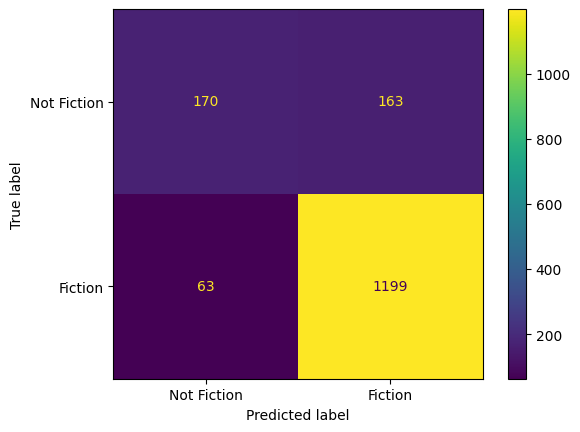

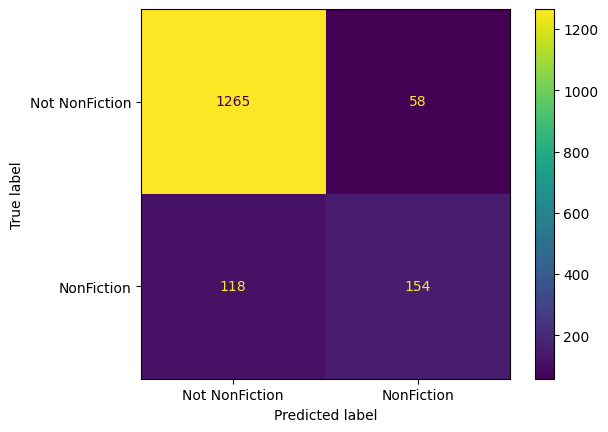

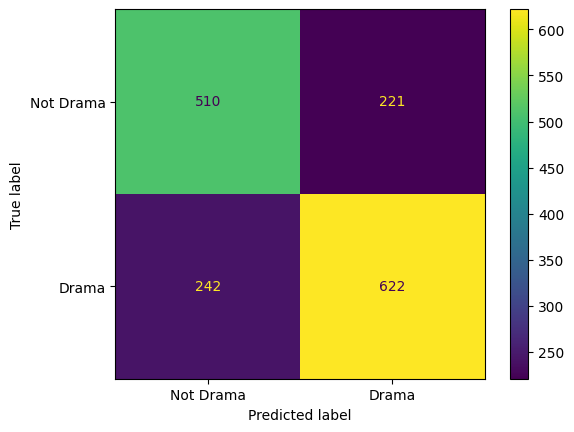

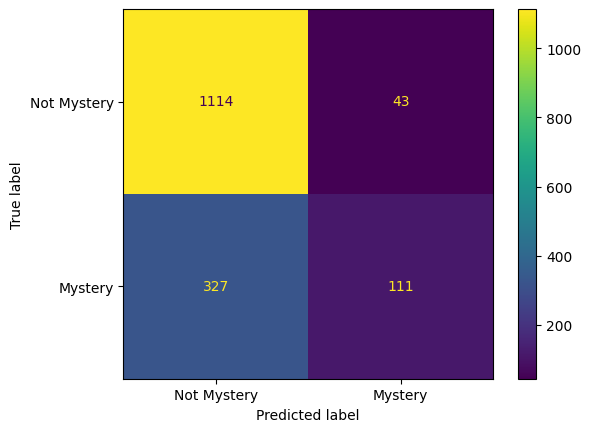

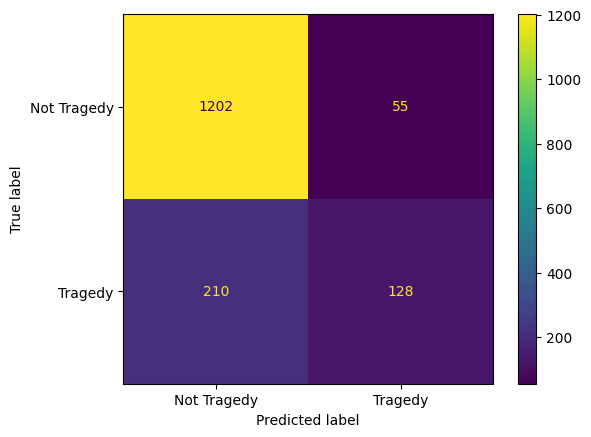

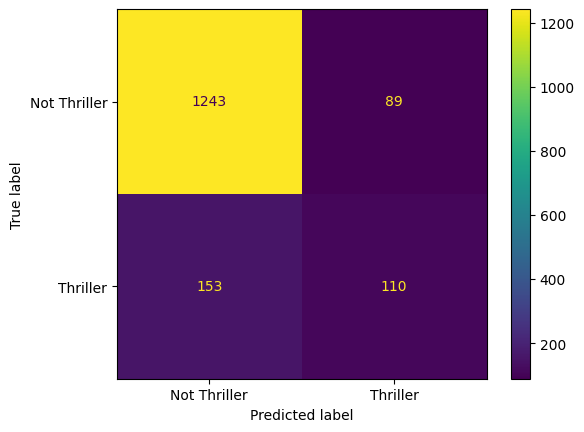

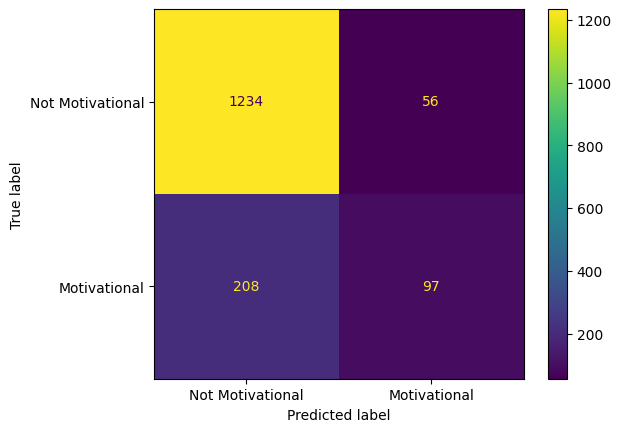

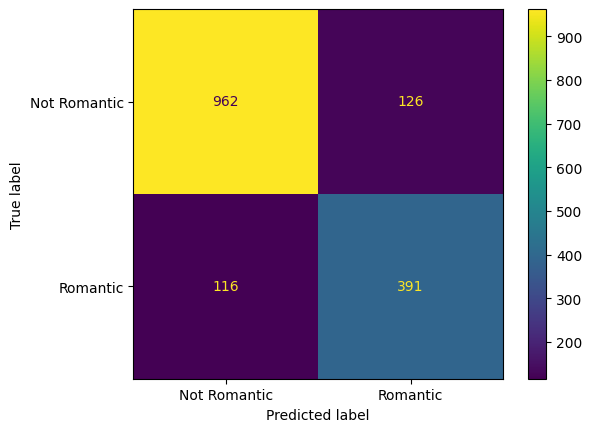

In [103]:
y_pred1 = np.where(y_pred >= .5, upper, lower)


from sklearn.metrics import multilabel_confusion_matrix
conf_mat = multilabel_confusion_matrix(y_test, y_pred1)


print("Each label accuracy: ")
for i in range(len(conf_mat)):
    print(LABEL_COLUMNS[i])
    multilabel_accuracies(conf_mat[i])
    
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

Fiction = conf_mat[0]
NonFiction = conf_mat[1]
Drama = conf_mat[2]
Mystery = conf_mat[3]
Tragedy = conf_mat[4]
Thriller = conf_mat[5]
Motivational = conf_mat[6]
Romantic = conf_mat[7]


cm_Fiction = metrics.ConfusionMatrixDisplay(confusion_matrix = Fiction, display_labels = ['Not Fiction', 'Fiction'])
cm_NonFiction = metrics.ConfusionMatrixDisplay(confusion_matrix = NonFiction, display_labels = ['Not NonFiction', 'NonFiction'])
cm_Drama = metrics.ConfusionMatrixDisplay(confusion_matrix = Drama, display_labels = ['Not Drama','Drama'])
cm_Mystery = metrics.ConfusionMatrixDisplay(confusion_matrix = Mystery, display_labels = ['Not Mystery', 'Mystery'])
cm_Tragedy = metrics.ConfusionMatrixDisplay(confusion_matrix = Tragedy, display_labels = ['Not Tragedy', 'Tragedy'])
cm_Thriller = metrics.ConfusionMatrixDisplay(confusion_matrix = Thriller, display_labels = ['Not Thriller', 'Thriller'])
cm_Motivational = metrics.ConfusionMatrixDisplay(confusion_matrix = Motivational, display_labels = ['Not Motivational', 'Motivational'])
cm_Romantic = metrics.ConfusionMatrixDisplay(confusion_matrix = Romantic, display_labels = ['Not Romantic', 'Romantic'])


cm_Fiction.plot()
cm_NonFiction.plot()
cm_Drama.plot()
cm_Mystery.plot()
cm_Tragedy.plot()
cm_Thriller.plot()
cm_Motivational.plot()
cm_Romantic.plot()

plt.show()

In [106]:
import matplotlib.pyplot as plt

def plot_graphs(history, metric):
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])

(0.0, 0.5819629684090615)

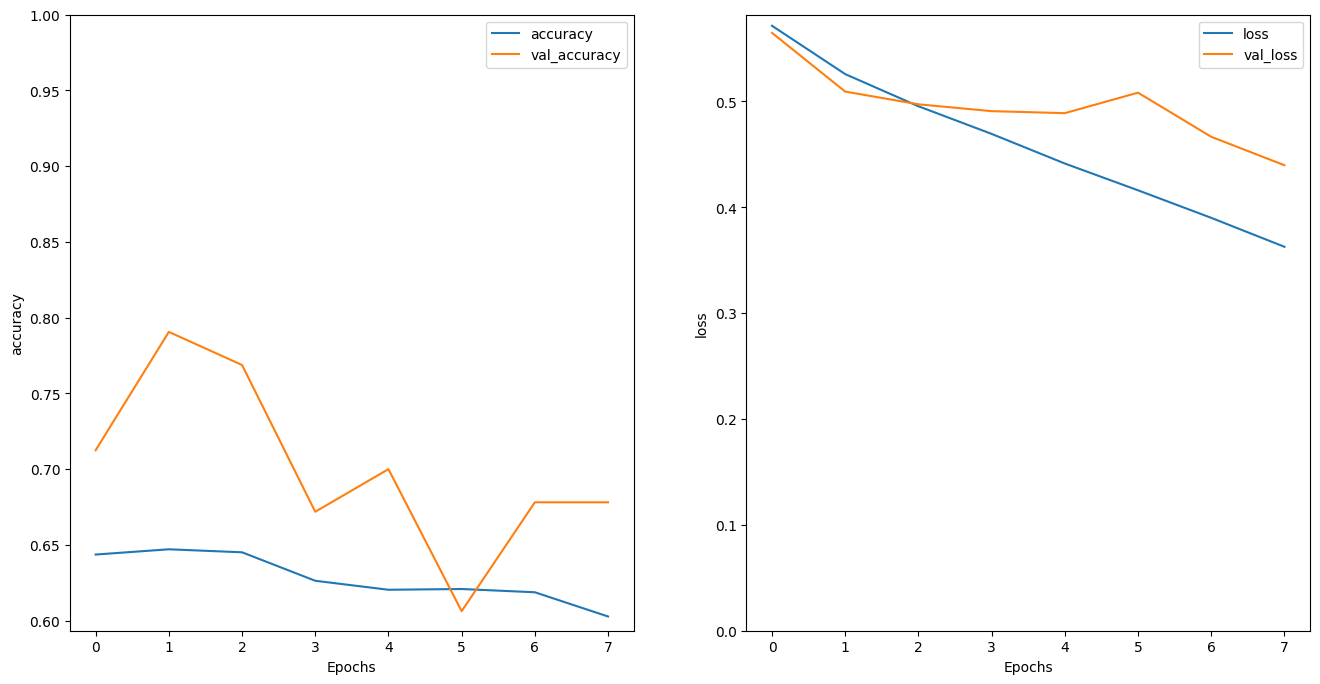

In [107]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

In [116]:
#!pip install pytest-shutil

In [118]:
model.save_weights("CNN_BiLSTM_ATTENTION_Multi80")

# Optional: Zip the saved weights folder


In [ ]:
import shutil
shutil.make_archive("CNN_BiLSTM_ATTENTION_Multi80", 'zip', '.')

In [119]:
model1 = model


In [121]:
# model1.load_weights("CNN_LSTM_ATTENTION_BERT_WITH_ATTENTION_UPD")


In [122]:
LABEL_COLUMNS


['Fiction',
 'NonFiction',
 'Drama',
 'Mystery',
 'Tragedy',
 'Thriller',
 'Motivational',
 'Romantic']

In [124]:
def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=512, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction(model, processed_data, classes=LABEL_COLUMNS):
    probs = model.predict(processed_data)[0]
    return np.where(probs >= Threshold, upper, lower)

input_text = cleaningData('সম্পাদকীয়, প্রিয় পাঠক, বহু বইয়ের ভিড়ে আমাদের বইটি হাতে তুলে নিয়েছেন তাই প্রথমে আপনার প্রতি অশেষ কৃতজ্ঞতা। কথায় আছে, “লেখক লেখেন তাঁর ধ্যানে এবং পাঠক পড়েন তাঁর জ্ঞানে।” যুগে যুগে সেরা সাহিত্যিকগণ সর্বদা চেষ্টা করেছেন তাঁদের লেখায় গভীর জীবনবোধকে তুলে ধরতে, সমাজের দূর্ভাগ্যজনক ঘটনা, পল্লী ও নাগরিক চালচিত্র ফুটিয়ে তুলে পাঠক তথা সমাজের সব শ্রেণীর মানুষের কাছে পৌঁছে দিতে। বর্তমানে সময়ে ফেসবুক তথা অনলাইন হচ্ছে সামাজিক যোগাযোগের অন্যতম প্রধান মাধ্যম আর এই অনলাইনে আছে অসংখ্য লেখক ও অগুণিত পাঠক। এই অসংখ্য লেখকের মিলনমেলা থেকে সেরা লেখকদের সেরা লেখাটিকে নিয়ে সাজানো হয়েছে আমাদের এই “বিপ্রতীপ”-বইটি, যাঁদের সবাই অনলাইনের পরিচিত ও পরীক্ষিত নাম। ২০১৪-এর মহান একুশে বইমেলায় বিদ্যানন্দের উদ্যোগে প্রকাশিত হয়েছিল “শব্দভুক” ও “মেঘক্রান্তি” নামে দুটি বই যা এবারে মতো অনলাইনের সেরা লেখকদের নিয়ে সাজানো হয়েছিলো। ভবিষ্যতেও এই প্রচেষ্টা অব্যাহত থাকবে। আমাদের বইয়ের যাবতীয় আয়ের অর্থ প্রায় তিনশ’র অধিক অসহায় শিশুর শিক্ষা, খেলাধুলাসহ যাবতীয় খরচ বহনের জন্য ব্যয় করা হবে। যার জন্য সকলের প্রিয় অনলাইনের উদীয়মান তরুণ লেখকরা তাঁদের কলম ধরেছেন! , বইয়ের প্রতিটি পরতে পরতে আছে যেমন প্রেম-বিরহ, তেমনি আছে রহস্য আর থ্রিলিং। কথা দিচ্ছি প্রিয় পাঠক বইয়ের প্রতিটি শব্দে আপনি খুঁজে পাবেন জীবনবোধের ইতিকথা! প্রিয় পাঠক, বিদ্যানন্দের এই প্রচেষ্টা সফল করতে প্রয়োজন আপনাদের সকলের দোয়া, ভালবাসা ও সমর্থন! সাফল্যটুকু সব অনাথ বাচ্চাগুলো এবং আপনাদের জন্য আর ব্যর্থতার দায়ভারটুকু আমাদের')
processed_data = prepare_data(input_text, tokenizer)
result = make_prediction(model1, processed_data=processed_data)
print(f"Classification results: {result}")

1/1 [==============================] - 3s 3s/step
Classification results: [0 1 0 0 0 0 1 0]


In [125]:
%%capture
!pip3 install lime

In [131]:
from lime.lime_text import LimeTextExplainer
class_names=['Fiction',
 'NonFiction',
 'Drama',
 'Mystery',
 'Tragedy',
 'Thriller',
 'Motivational',
 'Romantic']
explainer= LimeTextExplainer(class_names=class_names, split_expression=' ')

def predict_proba(arr):
    total_preds=[]
    for i in arr:
        tokens = prepare_data(i, tokenizer)
        preds = model.predict(tokens)[0]
        total_preds.append(preds)
    
    returnable = []
    for i in total_preds:
        temp = i
        returnable.append(np.array(temp))

    return np.array(returnable)

In [132]:
%%capture
sentence = cleaningData('সম্পাদকীয়, প্রিয় পাঠক, বহু বইয়ের ভিড়ে আমাদের বইটি হাতে তুলে নিয়েছেন তাই প্রথমে আপনার প্রতি অশেষ কৃতজ্ঞতা। কথায় আছে, “লেখক লেখেন তাঁর ধ্যানে এবং পাঠক পড়েন তাঁর জ্ঞানে।” যুগে যুগে সেরা সাহিত্যিকগণ সর্বদা চেষ্টা করেছেন তাঁদের লেখায় গভীর জীবনবোধকে তুলে ধরতে, সমাজের দূর্ভাগ্যজনক ঘটনা, পল্লী ও নাগরিক চালচিত্র ফুটিয়ে তুলে পাঠক তথা সমাজের সব শ্রেণীর মানুষের কাছে পৌঁছে দিতে। বর্তমানে সময়ে ফেসবুক তথা অনলাইন হচ্ছে সামাজিক যোগাযোগের অন্যতম প্রধান মাধ্যম আর এই অনলাইনে আছে অসংখ্য লেখক ও অগুণিত পাঠক। এই অসংখ্য লেখকের মিলনমেলা থেকে সেরা লেখকদের সেরা লেখাটিকে নিয়ে সাজানো হয়েছে আমাদের এই “বিপ্রতীপ”-বইটি, যাঁদের সবাই অনলাইনের পরিচিত ও পরীক্ষিত নাম। ২০১৪-এর মহান একুশে বইমেলায় বিদ্যানন্দের উদ্যোগে প্রকাশিত হয়েছিল “শব্দভুক” ও “মেঘক্রান্তি” নামে দুটি বই যা এবারে মতো অনলাইনের সেরা লেখকদের নিয়ে সাজানো হয়েছিলো। ভবিষ্যতেও এই প্রচেষ্টা অব্যাহত থাকবে। আমাদের বইয়ের যাবতীয় আয়ের অর্থ প্রায় তিনশ’র অধিক অসহায় শিশুর শিক্ষা, খেলাধুলাসহ যাবতীয় খরচ বহনের জন্য ব্যয় করা হবে। যার জন্য সকলের প্রিয় অনলাইনের উদীয়মান তরুণ লেখকরা তাঁদের কলম ধরেছেন! , বইয়ের প্রতিটি পরতে পরতে আছে যেমন প্রেম-বিরহ, তেমনি আছে রহস্য আর থ্রিলিং। কথা দিচ্ছি প্রিয় পাঠক বইয়ের প্রতিটি শব্দে আপনি খুঁজে পাবেন জীবনবোধের ইতিকথা! প্রিয় পাঠক, বিদ্যানন্দের এই প্রচেষ্টা সফল করতে প্রয়োজন আপনাদের সকলের দোয়া, ভালবাসা ও সমর্থন! সাফল্যটুকু সব অনাথ বাচ্চাগুলো এবং আপনাদের জন্য আর ব্যর্থতার দায়ভারটুকু আমাদের')


In [133]:
exp = explainer.explain_instance(sentence, predict_proba, num_features=15, num_samples=512, labels=[0, 1, 2, 3, 4, 5,6,7])


1/1 [==============================] - 1s 764ms/step


1/1 [==============================] - 1s 632ms/step


1/1 [==============================] - 1s 717ms/step


1/1 [==============================] - 1s 543ms/step


In [134]:
print('Text: প্রিয় পাঠক, বহু বইয়ের ভিড়ে আমাদের বইটি হাতে তুলে নিয়েছেন তাই প্রথমে আপনার প্রতি অশেষ কৃতজ্ঞতা। কথায় আছে, “লেখক লেখেন তাঁর ধ্যানে এবং পাঠক পড়েন তাঁর জ্ঞানে।” যুগে যুগে সেরা সাহিত্যিকগণ সর্বদা চেষ্টা করেছেন তাঁদের লেখায় গভীর জীবনবোধকে তুলে ধরতে, সমাজের দূর্ভাগ্যজনক ঘটনা, পল্লী ও নাগরিক চালচিত্র ফুটিয়ে তুলে পাঠক তথা সমাজের সব শ্রেণীর মানুষের কাছে পৌঁছে দিতে। বর্তমানে সময়ে ফেসবুক তথা অনলাইন হচ্ছে সামাজিক যোগাযোগের অন্যতম প্রধান মাধ্যম আর এই অনলাইনে আছে অসংখ্য লেখক ও অগুণিত পাঠক। এই অসংখ্য লেখকের মিলনমেলা থেকে সেরা লেখকদের সেরা লেখাটিকে নিয়ে সাজানো হয়েছে আমাদের এই “বিপ্রতীপ”-বইটি, যাঁদের সবাই অনলাইনের পরিচিত ও পরীক্ষিত নাম। ২০১৪-এর মহান একুশে বইমেলায় বিদ্যানন্দের উদ্যোগে প্রকাশিত হয়েছিল “শব্দভুক” ও “মেঘক্রান্তি” নামে দুটি বই যা এবারে মতো অনলাইনের সেরা লেখকদের নিয়ে সাজানো হয়েছিলো। ভবিষ্যতেও এই প্রচেষ্টা অব্যাহত থাকবে। আমাদের বইয়ের যাবতীয় আয়ের অর্থ প্রায় তিনশ’র অধিক অসহায় শিশুর শিক্ষা, খেলাধুলাসহ যাবতীয় খরচ বহনের জন্য ব্যয় করা হবে। যার জন্য সকলের প্রিয় অনলাইনের উদীয়মান তরুণ লেখকরা তাঁদের কলম ধরেছেন! , বইয়ের প্রতিটি পরতে পরতে আছে যেমন প্রেম-বিরহ, তেমনি আছে রহস্য আর থ্রিলিং। কথা দিচ্ছি প্রিয় পাঠক বইয়ের প্রতিটি শব্দে আপনি খুঁজে পাবেন জীবনবোধের ইতিকথা! প্রিয় পাঠক, বিদ্যানন্দের এই প্রচেষ্টা সফল করতে প্রয়োজন আপনাদের সকলের দোয়া, ভালবাসা ও সমর্থন! সাফল্যটুকু সব অনাথ বাচ্চাগুলো এবং আপনাদের জন্য আর ব্যর্থতার দায়ভারটুকু আমাদের')
exp.show_in_notebook(text=True, show_predicted_value=True, predict_proba=True)

Text: প্রিয় পাঠক, বহু বইয়ের ভিড়ে আমাদের বইটি হাতে তুলে নিয়েছেন তাই প্রথমে আপনার প্রতি অশেষ কৃতজ্ঞতা। কথায় আছে, “লেখক লেখেন তাঁর ধ্যানে এবং পাঠক পড়েন তাঁর জ্ঞানে।” যুগে যুগে সেরা সাহিত্যিকগণ সর্বদা চেষ্টা করেছেন তাঁদের লেখায় গভীর জীবনবোধকে তুলে ধরতে, সমাজের দূর্ভাগ্যজনক ঘটনা, পল্লী ও নাগরিক চালচিত্র ফুটিয়ে তুলে পাঠক তথা সমাজের সব শ্রেণীর মানুষের কাছে পৌঁছে দিতে। বর্তমানে সময়ে ফেসবুক তথা অনলাইন হচ্ছে সামাজিক যোগাযোগের অন্যতম প্রধান মাধ্যম আর এই অনলাইনে আছে অসংখ্য লেখক ও অগুণিত পাঠক। এই অসংখ্য লেখকের মিলনমেলা থেকে সেরা লেখকদের সেরা লেখাটিকে নিয়ে সাজানো হয়েছে আমাদের এই “বিপ্রতীপ”-বইটি, যাঁদের সবাই অনলাইনের পরিচিত ও পরীক্ষিত নাম। ২০১৪-এর মহান একুশে বইমেলায় বিদ্যানন্দের উদ্যোগে প্রকাশিত হয়েছিল “শব্দভুক” ও “মেঘক্রান্তি” নামে দুটি বই যা এবারে মতো অনলাইনের সেরা লেখকদের নিয়ে সাজানো হয়েছিলো। ভবিষ্যতেও এই প্রচেষ্টা অব্যাহত থাকবে। আমাদের বইয়ের যাবতীয় আয়ের অর্থ প্রায় তিনশ’র অধিক অসহায় শিশুর শিক্ষা, খেলাধুলাসহ যাবতীয় খরচ বহনের জন্য ব্যয় করা হবে। যার জন্য সকলের প্রিয় অনলাইনের উদীয়মান তরুণ লেখকরা তাঁদ

In [135]:
#%% ROC-AUC Curve

#y_score = cv_model.predict_proba(X_test)
y_score = model.predict([X_input_ids_test, X_attn_masks_test])

from scipy import interp
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Learn to predict each class against the other


n_classes = 8 # number of class




# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


50/50 [==============================] - 1062s 21s/step


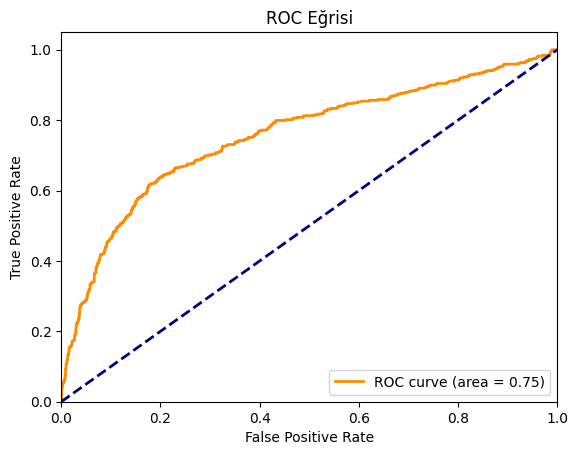

In [136]:
# The process of drawing a roc-auc curve belonging to a specific class

plt.figure()
lw = 2 # line_width
plt.plot(fpr[3], tpr[3], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[3]) # Drawing Curve according to 3. class 
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Eğrisi')
plt.legend(loc="lower right")
plt.show()

In [139]:
#!pip install itertools
#!pip install more-itertools

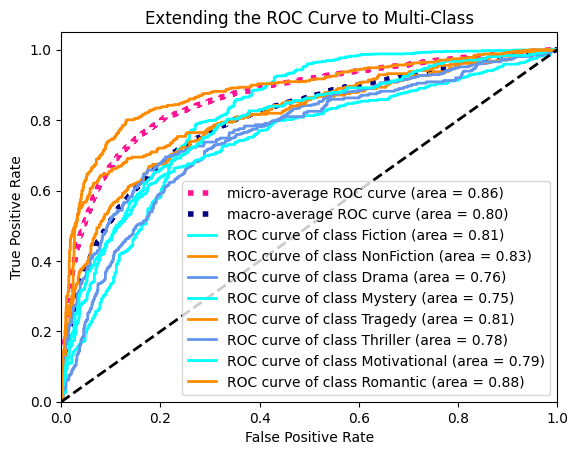

In [138]:
class_names=['Fiction',
 'NonFiction',
 'Drama',
 'Mystery',
 'Tragedy',
 'Thriller',
 'Motivational',
 'Romantic']
# Process of plotting roc-auc curve belonging to all classes.

from itertools import cycle

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes


fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

k = 0
plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)


colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class '+ class_names[k] + ' (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
    k = k+1

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Extending the ROC Curve to Multi-Class')
plt.legend(loc="lower right")
plt.show()